In [1]:
from numpy.linalg import inv
import numpy as np
from scipy.linalg import eig

from sklearn.datasets import make_s_curve
from sklearn.metrics import pairwise_distances

from diffmaps_util import *

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
%matplotlib nbagg

In [4]:
X, y = make_s_curve(n_samples=1000, noise=.6, random_state=0)
X[:5]

array([[ 0.38101086,  1.62206546,  0.07619804],
       [ 1.71768996, -0.00321579, -0.17517609],
       [-0.16915712,  0.92489276,  0.41436941],
       [ 0.50269735,  1.57362052,  0.81604401],
       [-1.60972033,  0.04603697,  0.73832703]])

<IPython.core.display.Javascript object>


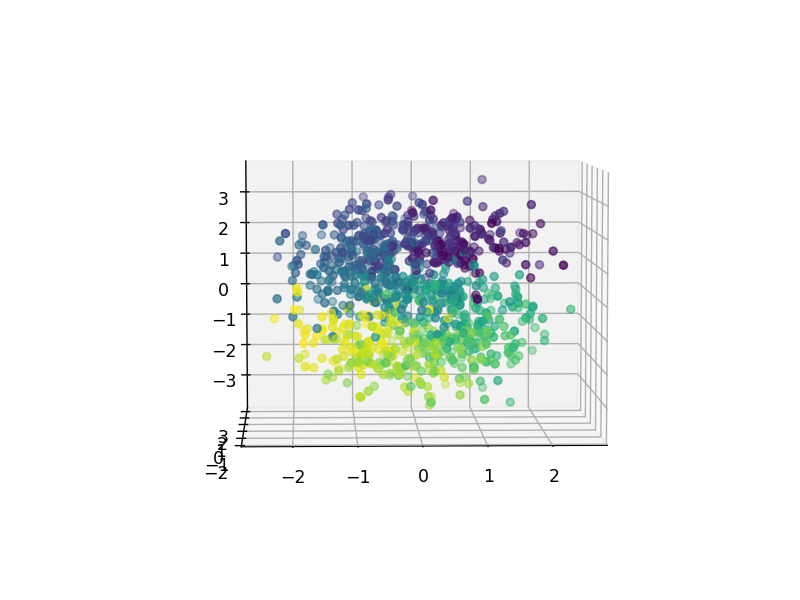

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
plt.show()

In [11]:
L = k(X, .9)
print 'L shape %s %s' % L.shape
D = diag(L)
print 'D shape %s %s' % D.shape

M = inv(D).dot(L)
print 'M shape %s %s' % M.shape

w, v = eig(M)
w = np.abs(w.real)
v = v.real
print 'eigenvalue shape %s' % w.shape
print 'eigenvector shape %s %s' % v.shape

L shape 1000 1000
D shape 1000 1000
M shape 1000 1000
eigenvalue shape 1000
eigenvector shape 1000 1000


In [12]:
w, v = sort_eigens(w, v)
print 'eigenvalue shape %s' % w.shape
print 'eigenvector shape %s %s' % v.shape

eigenvalue shape 1000
eigenvector shape 1000 1000


In [13]:
psi = v / v[:,0]
psi.shape

(1000L, 1000L)

In [14]:
diffmap = (w.reshape(-1,1) * psi.T).T[:,1:]
diffmap.shape

(1000L, 999L)

<IPython.core.display.Javascript object>


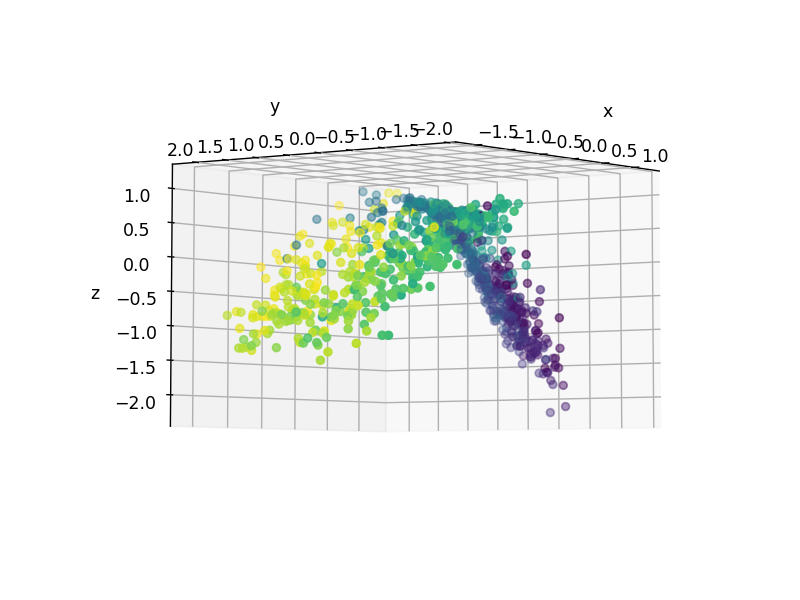

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
diffmap = (w.reshape(-1,1) * psi.T).T[:,1:]
diffmap.shape
ax.scatter(diffmap[:,0], diffmap[:,1], diffmap[:,2], c=y )
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')